In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DATA CLEANING

In [3]:
df=pd.read_csv('Netflix_TV_Shows_and_Movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [4]:
df.drop(columns=['index','id','imdb_id'], inplace=True)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [5]:
pd.set_option('display.max_colwidth',None)
uniqueitem=[]

for col in df.columns:
    uniqueitem.append([col, df[col].nunique(), df[col].unique(),df[col].dtype])

unique=pd.DataFrame(columns=['Column','Count of Unique Items','Unique Items', 'Datatype'], data=uniqueitem)
unique

Column  Count of Unique Items  \
0              title                   5237   
1               type                      2   
2        description                   5276   
3       release_year                     66   
4  age_certification                     11   
5            runtime                    197   
6         imdb_score                     81   
7         imdb_votes                   3831   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6]:
#missing values
df.isna().sum()

title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [7]:
df['age_certification'].fillna('Unknown', inplace=True)
df.isna().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_7856\3492408922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('Unknown', inplace=True)


title                 0
type                  0
description           5
release_year          0
age_certification     0
runtime               0
imdb_score            0
imdb_votes           16
dtype: int64

In [8]:
#Dealing with Imdb votes

df.dropna(subset=['imdb_votes'], inplace=True)
df.isna().sum()

title                0
type                 0
description          4
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

In [9]:
# EXPLORATORY DATA ANALYSIS

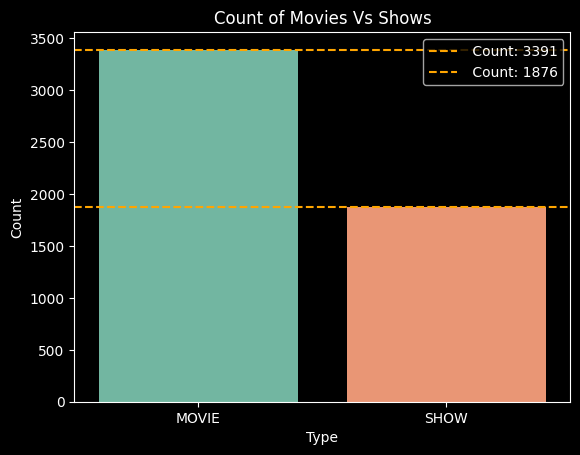

In [10]:
#COUNTPLOT

plt.style.use('dark_background');
sns.countplot(data=df, x='type',hue='type', palette='Set2')

counts=df['type'].value_counts()
for i in counts:
    plt.axhline(y=i, color='orange', linestyle='--',)
    
plt.legend([f' Count: {j}' for j in counts])

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movies Vs Shows')
plt.show()

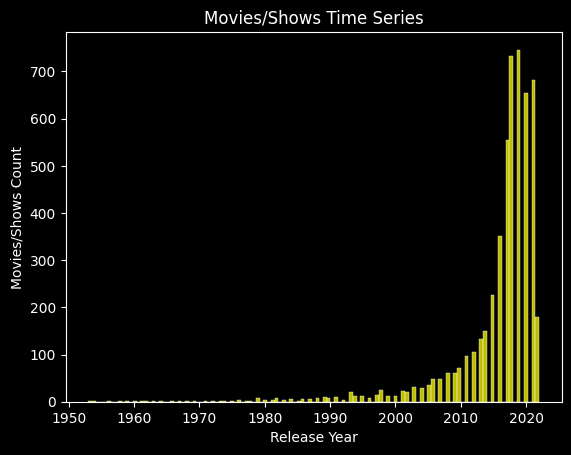

In [11]:
#TIME SERIES PLOT

plt.style.use('dark_background');
sns.histplot(data=df, x='release_year', color='yellow')
plt.xlabel('Release Year')
plt.ylabel('Movies/Shows Count')
plt.title('Movies/Shows Time Series')
plt.show()

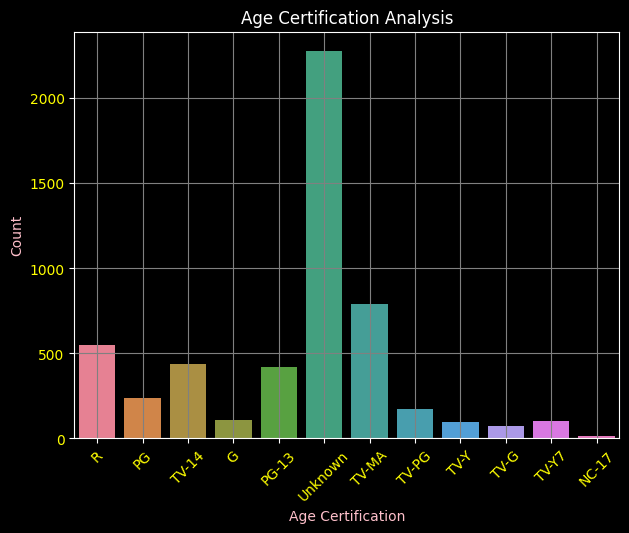

In [12]:
sns.countplot(data=df, x='age_certification', hue='age_certification', )
plt.xlabel('Age Certification', color='pink')
plt.ylabel('Count', color='pink')
plt.tight_layout()
plt.xticks(rotation=45, color='yellow')
plt.yticks(color='yellow')
plt.grid(color='grey')
plt.title('Age Certification Analysis')
plt.show()

In [13]:
rt=df.groupby('type')[['runtime']].sum().reset_index()
rt

,type,runtime
0,MOVIE,345242
1,SHOW,72475


In [14]:
max_movie=rt.loc[rt['type']=='MOVIE', 'runtime'].max()
max_show=rt.loc[rt['type']=='SHOW','runtime'].max()

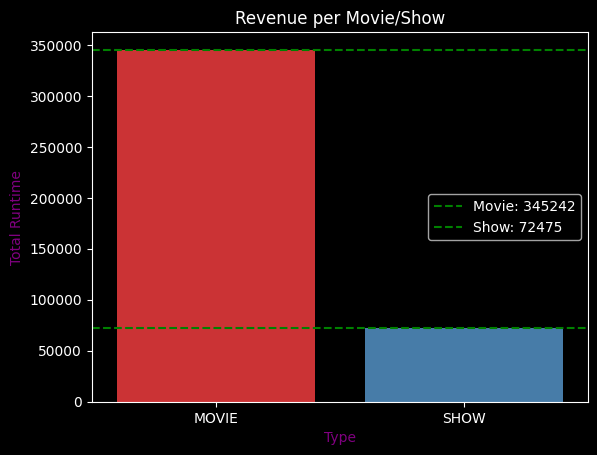

In [15]:
plt.style.use('dark_background');
sns.barplot(data=rt, x='type', y='runtime',hue='type', palette='Set1')

plt.axhline(y=max_movie, color='green', linestyle='--', label=f'Movie: {max_movie}')
plt.axhline(y=max_show, color='green', linestyle='--', label=f'Show: {max_show}')
plt.xlabel('Type', color='purple')
plt.ylabel('Total Runtime',color='purple')
plt.title('Revenue per Movie/Show')
plt.legend()
plt.show()

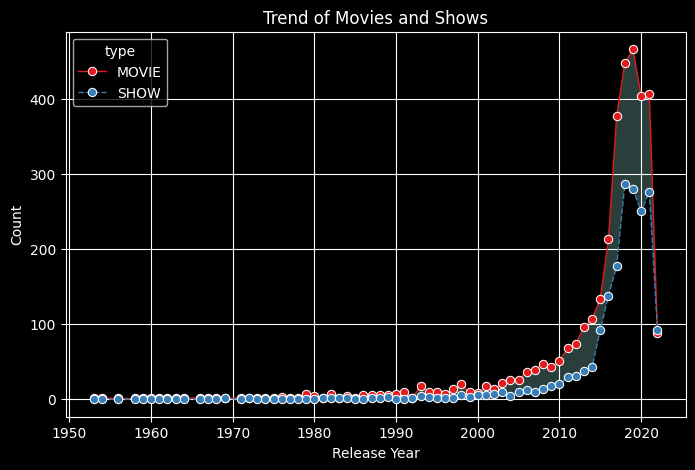

In [16]:
#LINE PLOT
plt.style.use('dark_background');
ct=pd.crosstab(index=df['release_year'], columns=df['type'])
plt.figure(figsize=(8,5))
sns.lineplot(data=ct, palette='Set1', linewidth=1, marker='o')
plt.fill_between(ct.index, ct['MOVIE'], ct['SHOW'], alpha=0.3)
plt.grid()
plt.title('Trend of Movies and Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

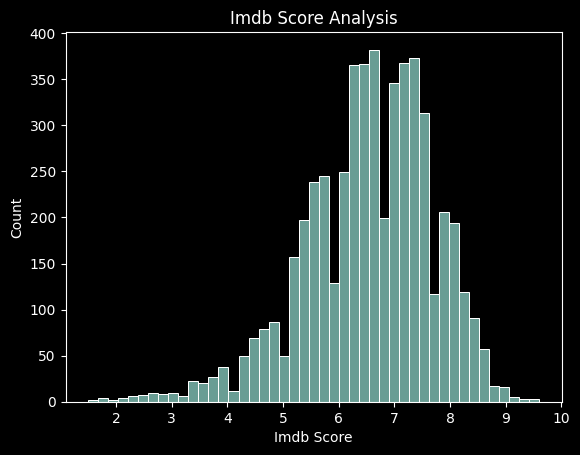

In [17]:
# IMDB SCORE COUNTS

plt.style.use('dark_background');
sns.histplot(data=df, x='imdb_score')
plt.xlabel('Imdb Score')
plt.title('Imdb Score Analysis')
plt.show()

In [18]:
df['imdb_score'].mean()

6.533263717486235

In [19]:
df['imdb_score'].mode()[0]

6.6

In [20]:
# CORRELATION ANALYSIS

In [21]:
score_vote= df.groupby('imdb_score')['imdb_votes'].count().reset_index()
score_vote.head()

,imdb_score,imdb_votes
0,1.5,1
1,1.6,1
2,1.7,3
3,1.8,1
4,1.9,1


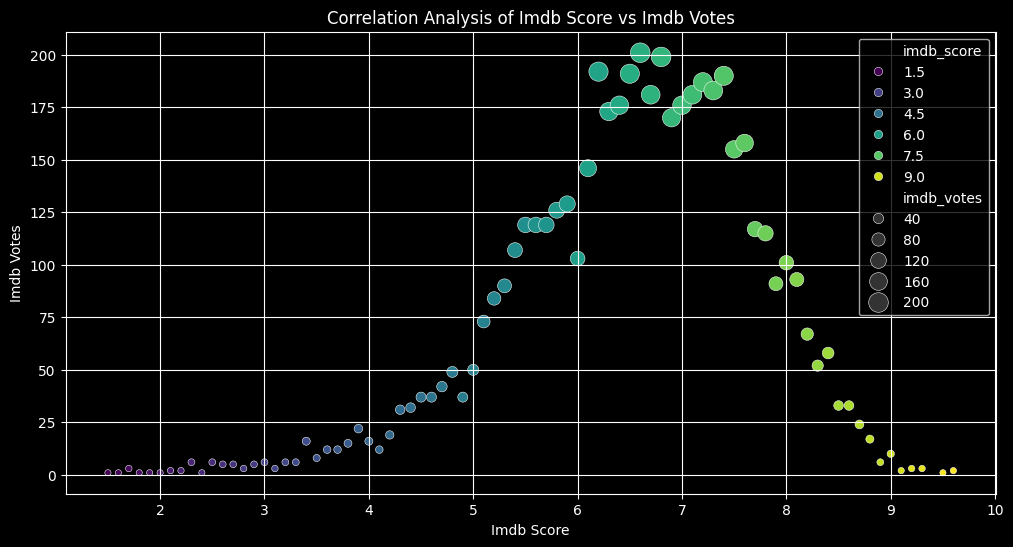

In [22]:
#SCATTERPLOT

plt.style.use('dark_background');
plt.figure(figsize=(12,6))
sns.scatterplot(data=score_vote, x='imdb_score', y='imdb_votes', hue='imdb_score', palette='viridis',size='imdb_votes', sizes=(20,200))
plt.xlabel('Imdb Score')
plt.ylabel('Imdb Votes')
plt.title('Correlation Analysis of Imdb Score vs Imdb Votes')
plt.grid()
plt.show()

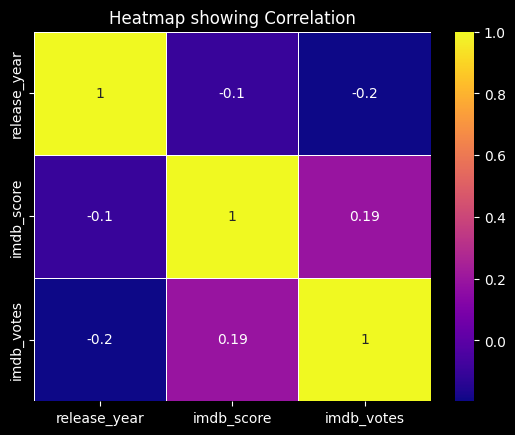

In [23]:
# HEATMAP

plt.style.use('dark_background');
heatmap_data=df[['release_year', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(data=heatmap_data, annot=True, cmap='plasma', cbar=True, linewidths=0.5)
plt.title('Heatmap showing Correlation')
plt.show()

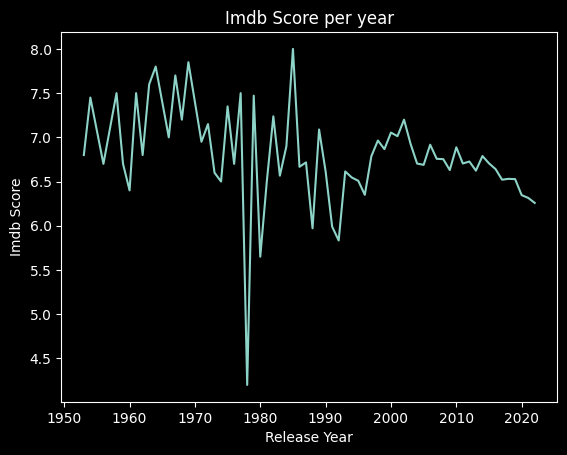

In [24]:
plt.style.use('dark_background');
sns.lineplot(data=df, x='release_year', y='imdb_score',errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Imdb Score')
plt.title('Imdb Score per year')
plt.show()

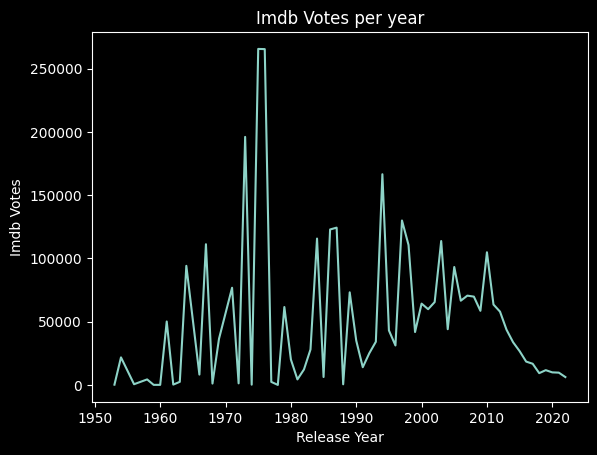

In [25]:
plt.style.use('dark_background');
sns.lineplot(data=df, x='release_year', y='imdb_votes', errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Imdb Votes')
plt.title('Imdb Votes per year')
plt.show()

In [26]:
x=np.array(df[['imdb_votes']])
y=np.array(df[['imdb_score']])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [32]:
linear_pred = linear_model.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [34]:
mae(y_test, linear_pred)

0.891727668085064

In [35]:
mse(y_test, linear_pred)

1.3071559909991874

In [36]:
np.sqrt(mse(y_test, linear_pred))

1.1433092280740096

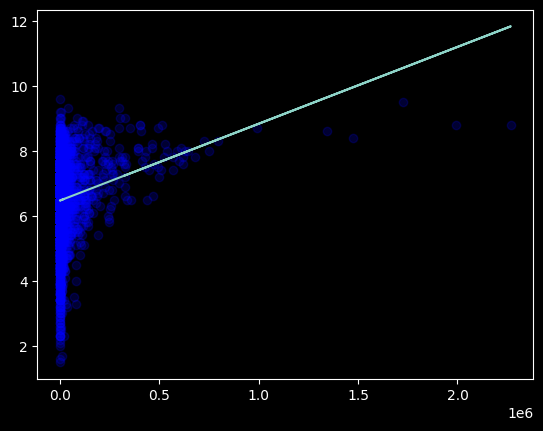

In [37]:
plt.scatter(x_train,y_train,color='blue', alpha=0.2)
plt.plot(x_train, linear_model.predict(x_train))

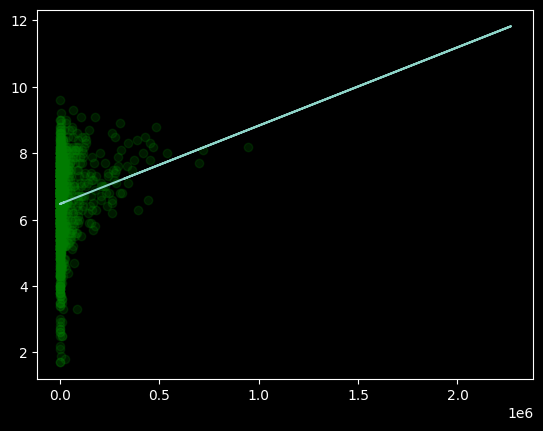

In [38]:
plt.scatter(x_test,y_test,color='green', alpha=0.2)
plt.plot(x_train, linear_model.predict(x_train))

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtree = DecisionTreeRegressor()

In [41]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
dtree_predict = dtree.predict(x_test)

In [43]:
print('MAE : ',mae(y_test, dtree_predict))

MAE :  1.1675426944971536


In [44]:
print('MSE : ',mse(y_test, dtree_predict))

MSE :  2.2455589693583526


In [45]:
print('RMSE : ',np.sqrt(mse(y_test, dtree_predict)))

RMSE :  1.4985189252586544


In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfr =RandomForestRegressor(n_estimators=3000)

In [48]:
rfr.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=3000)

In [49]:
rfr_pred = rfr.predict(x_test)

In [50]:
print('MAE : ',mae(y_test, rfr_pred))

MAE :  1.0312201729243151


In [51]:
print('MSE : ',mse(y_test, rfr_pred))

MSE :  1.7583620799586848


In [52]:
print('RMSE : ',np.sqrt(mse(y_test, rfr_pred)))

RMSE :  1.3260324581090333


In [53]:
# GRADIENT BOOSTING REGRESSOR

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [56]:
gbr.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [57]:
gbr_predict = gbr.predict(x_test)

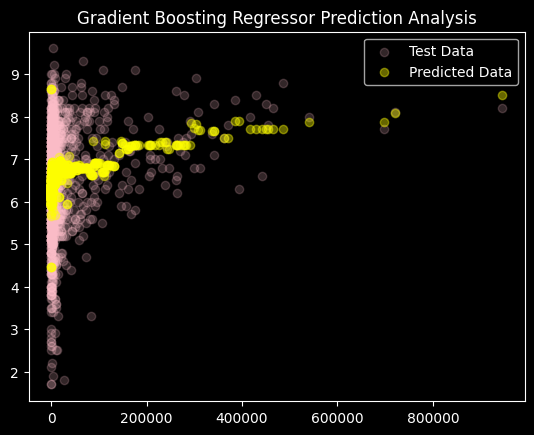

In [58]:
#plt.scatter(x_train, y_train, color='blue',marker='o', alpha=0.5, label='Training Data')
plt.scatter(x_test,y_test, color='pink', alpha=0.2, label='Test Data')
plt.scatter(x_test,gbr_predict, color='yellow', alpha=0.4, label='Predicted Data')
plt.title('Gradient Boosting Regressor Prediction Analysis')
plt.legend()

In [59]:
print('MAE : ',mae(y_test, gbr_predict))

MAE :  0.8917740321739915


In [60]:
print('RMSE : ',np.sqrt(mse(y_test, gbr_predict)))

RMSE :  1.1372504387731714


In [61]:
# HYPERPARAMETER TUNING WITH BAYESSEARCHCV

In [62]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [63]:
param_space = {
    'n_estimators' : Integer(50,200),
    'learning_rate' : Real(0.01, 0.3, prior='log-uniform'),
    'max_depth' : Integer(3,10),
    'min_samples_split' : Integer(2,20),
    'min_samples_leaf' : Integer(1,10)
}

In [64]:
bayes_search = BayesSearchCV(search_spaces=param_space, estimator=gbr, scoring='neg_mean_squared_error', random_state=42, cv=5, n_iter=50)

In [65]:
bayes_search.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ens

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize')})

In [66]:
print('The best hyperparameters are :', bayes_search.best_params_)

The best hyperparameters are : OrderedDict({'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})


In [67]:
best_model_bayes = bayes_search.best_estimator_

In [68]:
test_mse_bayes = best_model_bayes.score(x_test, y_test)

In [69]:
print('Test Mean Square Error via Bayes Search CV method is :', test_mse_bayes)

Test Mean Square Error via Bayes Search CV method is : 0.05025398172417428


In [70]:
gbr_tuned = GradientBoostingRegressor(
learning_rate = 0.013225102561244139, 
max_depth = 4, 
min_samples_leaf = 1, 
min_samples_split = 20, 
n_estimators = 154
)

In [71]:
gbr_tuned.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.013225102561244139, max_depth=4,
                          min_samples_split=20, n_estimators=154)

In [72]:
gbr_tuned_predict = gbr_tuned.predict(x_test)

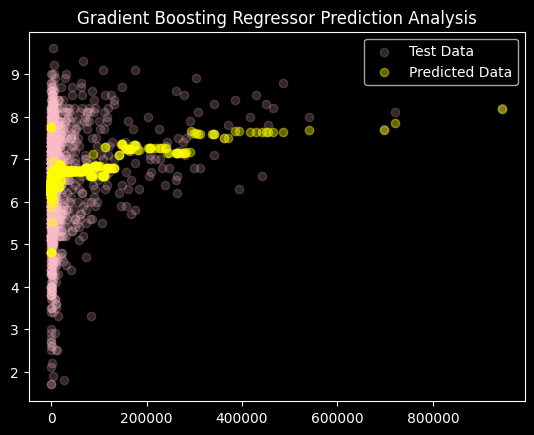

In [73]:
#plt.scatter(x_train, y_train, color='blue',marker='o', alpha=0.5, label='Training Data')
plt.scatter(x_test,y_test, color='pink', alpha=0.2, label='Test Data')
plt.scatter(x_test,gbr_tuned_predict, color='yellow', alpha=0.4, label='Predicted Data')
plt.title('Gradient Boosting Regressor Prediction Analysis')
plt.legend()

In [74]:
print('MAE :',mae(y_test, gbr_tuned_predict))

MAE : 0.8857314546741737


In [75]:
print('RMSE :',np.sqrt(mse(y_test, gbr_tuned_predict)))

RMSE : 1.1330845477117208


In [76]:
# GEADIENT BOOSTING REGRESSOR SHOWS THE BEST RESULT WITH BAYES SEARCH CV HYPER PARAMETER TUNING

**TEXT ANALYSIS**

In [77]:
import spacy

In [78]:
nlp = spacy.load("en_core_web_sm")

In [79]:
import nltk

In [80]:
from nltk.corpus import stopwords

In [81]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [82]:
# TEXT PREPROCESSING

In [83]:
desc = df[['description']]

In [84]:
# CONVERT TEXT TO LOWERCASE

def to_lowercase(text):
    return text.lower()

In [85]:
# REMOVE CONTRACTIONS

import contractions
def rem_contractions(text):
    return contractions.fix(text)

In [86]:
# REMOVING THE NUMBERS

def remove_nos(text):
    return ''.join([x for x in text if not x.isdigit()])

In [87]:
# REMOVING THE PUNCTUATIONS

from string import punctuation
def remove_punct(text):
    return ''.join([x for x in text if x not in punctuation])

In [88]:
# REMOVING WHITE SPACES

def remove_whitespace(text):
    return ' '.join(x for x in text.split())

In [89]:
# REMOVING STOPWORDS

def remove_stopwords(text):
    return ' '.join(x for x in word_tokenize(text) if x not in stopwords.words('English'))

In [90]:
type(desc)


pandas.core.frame.DataFrame

In [91]:
desc = desc.astype('str')

In [92]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:

desc['x1'] = desc['description'].apply(to_lowercase)
desc['x2'] = desc['x1'].apply(rem_contractions)
desc['x3'] = desc['x2'].apply(remove_nos)
desc['x4'] = desc['x3'].apply(remove_punct)
desc['x5'] = desc['x4'].apply(remove_whitespace)
desc['x6'] = desc['x5'].apply(remove_stopwords)
desc.head(1)


,description,x1,x2,x3,x4,x5,x6
0,"A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.",a mentally unstable vietnam war veteran works as a nighttime taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action attempting to save a preadolescent prostitute in the process,a mentally unstable vietnam war veteran works as a nighttime taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action attempting to save a preadolescent prostitute in the process,mentally unstable vietnam war veteran works nighttime taxi driver new york city perceived decadence sleaze feed urge violent action attempting save preadolescent prostitute process


In [94]:
def lemmatize_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [95]:
desc['Lemmatization'] = desc['x6'].apply(lemmatize_spacy)

In [96]:
desc.head(2)

,description,x1,x2,x3,x4,x5,x6,Lemmatization
0,"A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.","a mentally unstable vietnam war veteran works as a night-time taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.",a mentally unstable vietnam war veteran works as a nighttime taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action attempting to save a preadolescent prostitute in the process,a mentally unstable vietnam war veteran works as a nighttime taxi driver in new york city where the perceived decadence and sleaze feed his urge for violent action attempting to save a preadolescent prostitute in the process,mentally unstable vietnam war veteran works nighttime taxi driver new york city perceived decadence sleaze feed urge violent action attempting save preadolescent prostitute process,mentally unstable vietnam war veteran work nighttime taxi driver new york city perceive decadence sleaze feed urge violent action attempt save preadolescent prostitute process
1,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".","king arthur, accompanied by his squire, recruits his knights of the round table, including sir bedevere the wise, sir lancelot the brave, sir robin the not-quite-so-brave-as-sir-lancelot and sir galahad the pure. on the way, arthur battles the black knight who, despite having had all his limbs chopped off, insists he can still fight. they reach camelot, but arthur decides not to enter, as ""it is a silly place"".","king arthur, accompanied by his squire, recruits his knights of the round table, including sir bedevere the wise, sir lancelot the brave, sir robin the not-quite-so-brave-as-sir-lancelot and sir galahad the pure. on the way, arthur battles the black knight who, despite having had all his limbs chopped off, insists he can still fight. they reach camelot, but arthur decides not to enter, as ""it is a silly place"".","king arthur, accompanied by his squire, recruits his knights of the round table, including sir bedevere the wise, sir lancelot the brave, sir robin the not-quite-so-brave-as-sir-lancelot and sir galahad the pure. on the way, arthur battles the black knight who, despite having had all his limbs chopped off, insists he can still fight. they reach camelot, but arthur decides not to enter, as ""it is a silly place"".",king arthur accompanied by his squire recruits his knights of the round table including sir bedevere the wise sir lancelot the brave sir robin the notquitesobraveassirlancelot and sir galahad the pure on the way arthur battles the black knight who despite having had all his limbs chopped off insists he can still fight they reach camelot but arthur decides not to enter as it is a silly place,king arthur accompanied by his squire recruits his knights of the round table including sir bedevere the wise sir lancelot the brave sir robin the notquit

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [98]:
vector = CountVectorizer()

In [99]:
result = vector.fit_transform(desc['Lemmatization'])

In [100]:
vector.vocabulary_

{'mentally': 10501,
 'unstable': 17470,
 'vietnam': 17751,
 'war': 17940,
 'veteran': 17713,
 'work': 18285,
 'nighttime': 11444,
 'taxi': 16429,
 'driver': 4754,
 'new': 11373,
 'york': 18493,
 'city': 2974,
 'perceive': 12426,
 'decadence': 4023,
 'sleaze': 15360,
 'feed': 5806,
 'urge': 17551,
 'violent': 17793,
 'action': 139,
 'attempt': 1099,
 'save': 14506,
 'preadolescent': 12894,
 'prostitute': 13105,
 'process': 13025,
 'king': 9068,
 'arthur': 963,
 'accompanied': 91,
 'squire': 15750,
 'recruit': 13599,
 'knight': 9129,
 'round': 14192,
 'table': 16295,
 'include': 8024,
 'sir': 15265,
 'bedevere': 1520,
 'wise': 18218,
 'lancelot': 9313,
 'brave': 2046,
 'robin': 14080,
 'notquitesobraveassirlancelot': 11594,
 'galahad': 6399,
 'pure': 13195,
 'way': 17993,
 'battle': 1467,
 'black': 1789,
 'despite': 4252,
 'limb': 9595,
 'chop': 2899,
 'insist': 8205,
 'still': 15878,
 'fight': 5896,
 'reach': 13494,
 'camelot': 2377,
 'decide': 4042,
 'enter': 5229,
 'silly': 15196,
 'p

In [101]:
result_df = pd.DataFrame(result.toarray(), columns=vector.get_feature_names_out())
result_df.head(2)

,aage,aaliya,aardman,aaron,aata,aback,abad,abah,abandon,abang,...,œwhitney,œwhy,œwill,œwitnessâ,œworst,œxiaosanâ,œyesterdayâ,œç,žå,ƒtis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
word_count = result_df.sum(axis=0).sort_values(ascending=False)
word_count

life        926
love        631
world       626
family      618
find        617
           ... 
irrfan        1
irritate      1
isabel        1
isaki         1
ƒtis          1
Length: 18750, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_7856\1555274544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.head(10), y=word_count.head(10).index, palette='crest_r', alpha=0.9)


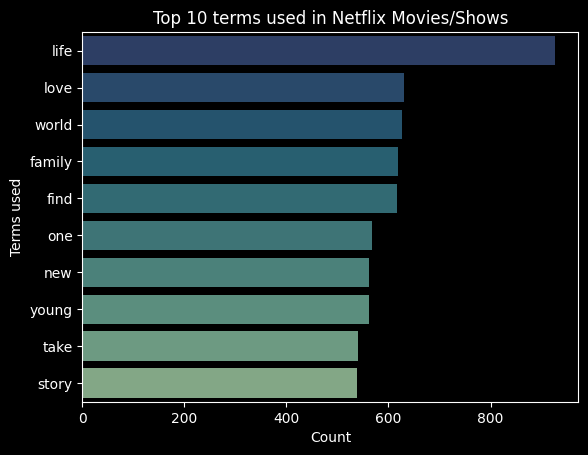

In [103]:
sns.barplot(x=word_count.head(10), y=word_count.head(10).index, palette='crest_r', alpha=0.9)
plt.title('Top 10 terms used in Netflix Movies/Shows')
plt.xlabel('Count')
plt.ylabel('Terms used')
plt.show()

In [104]:
from wordcloud import WordCloud

In [105]:
wc = WordCloud(colormap='cool_r').generate(str(desc['Lemmatization']))

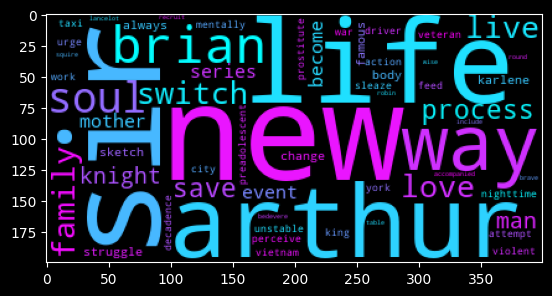

In [106]:
plt.imshow(wc)

In [107]:
import joblib

In [108]:
joblib.dump(gbr_tuned, 'tuned_gradient_boosting_model.pk1')

['tuned_gradient_boosting_model.pk1']